# Practica 4

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def tngh(x):
    return np.tanh(x)

def tngh_prime(x):
    return 1 - np.tanh(x)**2


#   1. XOR

##  Arquitectura 1 

In [54]:
x_t = np.array([[0,0],[0,1],[1,0],[1,1]])
y_t = np.array([[0],[1],[1],[0]])

def N_network(x, w_1 , w_2, b_1, b_2):
    # x = shape (2,1)
    # w_1 = shape (2,2)
    # w_2 = shape (1,2)
    # b_1 = shape (2,1)
    # b_2 = shape (1,1)

    z_1 = tngh(np.dot(w_1, x) + b_1)
    z_2 = tngh(np.dot(w_2, z_1) + b_2)
    return z_2


# backpropagation algorithm

def backpropagation(x, y, w_1, w_2, b_1, b_2, lr):
    # x = shape (2,1)
    # w_1 = shape (2,2)
    # w_2 = shape (1,2)
    # b_1 = shape (2,1)
    # b_2 = shape (1,1)
    # y = shape (1,1)

    # forward pass
    z_1 = tngh(np.dot(w_1, x) + b_1)
    z_2 = tngh(np.dot(w_2, z_1) + b_2)

    # print(f'h_1: {np.dot(w_1, x) + b_1}')
    # print(f'h_2: {np.dot(w_2, z_1) + b_2}')


    # backpropagation
    # calculate the error
    error = 0.5 * (y - z_2)**2

    # calculate the gradient
    delta = (y - z_2) * tngh_prime(np.dot(w_2, z_1) + b_2)
    grad_w_2 = np.dot(delta, z_1.T)
    grad_b_2 = delta
    # print('delta: ',delta)


    delta = np.dot(w_2.T, delta) * tngh_prime(np.dot(w_1, x) + b_1)
    grad_w_1 = np.dot(delta, x.T)
    grad_b_1 = delta

    return grad_w_1, grad_w_2, grad_b_1, grad_b_2, error


def Arq_1(epochs=10000, lr=0.1):
    # training
    w_1 = np.random.randn(2,2)
    w_2 = np.random.randn(1,2)
    b_1 = np.random.randn(2,1)
    b_2 = np.random.randn(1,1)

    # b_1= np.array([[0.08943778],[2.61555368]])
    # w_1=np.array([[-0.28189808 ,1.10715884],[-0.34368006,-0.95352334]])
    # w_2=np.array([[0.9455604,0.39621925]])
    # b_2=np.array([0.10154302])

    # print('antes: ')
    # print(f'w_1: {w_1}')
    # print(f'w_2: {w_2}')
    # print(f'b_1: {b_1}')
    # print(f'b_2: {b_2} \n')

    error = []

    for i in range(epochs):
        G_w_1 = []
        G_w_2 = []
        G_b_1 = []
        G_b_2 = []
        err_acum = 0

        for j in range(x_t.shape[0]):
            x = x_t[j].reshape(2,1)
            y = y_t[j].reshape(1,1)
            # w_1, w_2, b_1, b_2, error = backpropagation(x, y, w_1, w_2, b_1, b_2, lr)
            grad_w_1, grad_w_2, grad_b_1, grad_b_2, err = backpropagation(x, y, w_1, w_2, b_1, b_2, lr)
            G_w_1.append(grad_w_1)
            G_w_2.append(grad_w_2)
            G_b_1.append(grad_b_1)
            G_b_2.append(grad_b_2)
            err_acum += err[0][0]
        
        error.append(err_acum)

        # update the weights
        G_w_1 = np.array(G_w_1)
        G_w_2 = np.array(G_w_2)
        G_b_1 = np.array(G_b_1)
        G_b_2 = np.array(G_b_2)
        

        w_1 = w_1 + lr * np.sum(G_w_1, axis=0)
        w_2 = w_2 + lr * np.sum(G_w_2, axis=0)
        b_1 = b_1 + lr * np.sum(G_b_1, axis=0)
        b_2 = b_2 + lr * np.sum(G_b_2, axis=0)

    
    return w_1, w_2, b_1, b_2, error

    # if i % 1000 == 0:
        # print(f'Error: {error[0][0]}')


Errores=[]

for i in range(20):
    w_1, w_2, b_1, b_2, error = Arq_1(epochs=10000, lr=0.1)
    Errores.append(error)

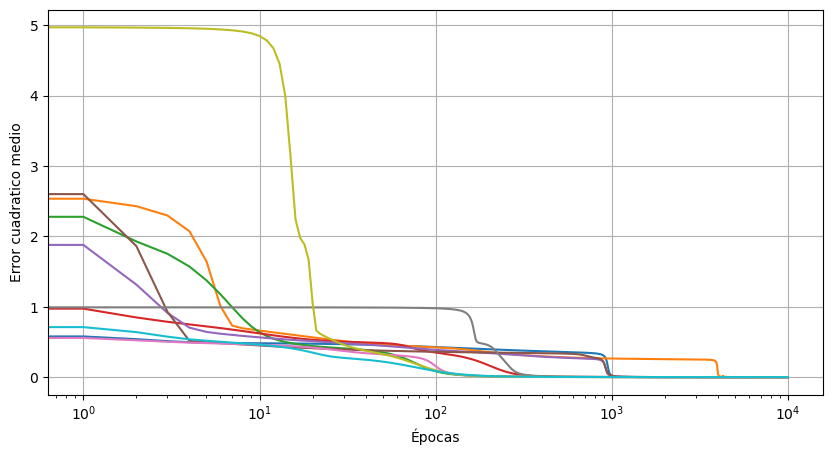

In [68]:
plt.figure(figsize=(10,5))
for i in [1,2,3,4,5,7,9,10,12,13]:
    plt.plot(Errores[i], label=i)

plt.xlabel('Épocas')
plt.ylabel('Error cuadratico medio')
plt.xscale('log')
plt.grid()
# plt.legend()

plt.savefig('Error_arq1.png', dpi=300, bbox_inches='tight')

##  Arquitectura 2

In [26]:
x_t = np.array([[0,0],[0,1],[1,0],[1,1]])
y_t = np.array([[0],[1],[1],[0]])

def N_network_1(X, W_1 , W_2, B_1, B_2):
    # X = shape (2,1)
    # W_1 = shape (1,2)
    # W_2 = shape (1,3) este conecta la neurona del medio y las dos de entrada con la salida
    # B_1 = shape (1,1)
    # B_2 = shape (1,1)

    Z_1 = tngh(np.dot(W_1, X) + B_1)
    # concateno las dos entradas con la neurona del medio
    x_= np.concatenate((X,Z_1), axis=0)
    Z_2 = tngh(np.dot(W_2, x_) + B_2)
    return Z_2

# backpropagation algorithm

def backpropagation_1(X, Y, W_1, W_2, B_1, B_2, lr):

    # forward pass
    Z_1 = tngh(np.dot(W_1, X) + B_1)
    x_= np.concatenate((X,Z_1), axis=0)
    Z_2 = tngh(np.dot(W_2, x_) + B_2)

    # print(f'h_1: {np.dot(w_1, x) + b_1}')
    # print(f'h_2: {np.dot(w_2, z_1) + b_2}')

    error = 0.5 * (Y - Z_2)**2

    # calculate the gradient
    delta = (Y - Z_2) * tngh_prime(np.dot(W_2, x_) + B_2)
    grad_W_2 = np.dot(delta, x_.T)
    grad_B_2 = delta
    # print('delta: ',delta)

    delta = np.dot(W_2.T[-1], delta) * tngh_prime(np.dot(W_1, X) + B_1)
    grad_W_1 = np.dot(delta, X.T)
    grad_B_1 = delta

    return grad_W_1, grad_W_2, grad_B_1, grad_B_2, error


def Arq_2(epochs=10000, lr=0.1):

    # training
    W_1 = np.random.randn(1,2)
    W_2 = np.random.randn(1,3)
    B_1 = np.random.randn(1,1)
    B_2 = np.random.randn(1,1)

    # B_1= np.array([[0.08943778],[2.61555368]])
    # W_1=np.array([[-0.28189808 ,1.10715884]])
    # W_2=np.array([[0.9455604,0.39621925,0.10154302]])
    # B_2=np.array([0.10154302])

    # print('antes: ')
    # print(f'W_1: {W_1}, \n W_2: {W_2}, \n B_1: {B_1}, \n B_2: {B_2} \n')

    error = []

    for i in range(epochs):
        err_acum = 0
        G_W_1 = []
        G_W_2 = []
        G_B_1 = []
        G_B_2 = []

        for j in range(x_t.shape[0]):
            X = x_t[j].reshape(2,1)
            Y = y_t[j].reshape(1,1)
            # w_1, w_2, b_1, b_2, error = backpropagation(x, y, w_1, w_2, b_1, b_2, lr)
            grad_W_1, grad_W_2, grad_B_1, grad_B_2, err = backpropagation_1(X, Y, W_1, W_2, B_1, B_2, lr)
            G_W_1.append(grad_W_1)
            G_W_2.append(grad_W_2)
            G_B_1.append(grad_B_1)
            G_B_2.append(grad_B_2)
            err_acum += err[0][0]

        error.append(err_acum)
        # update the weights
        G_W_1 = np.array(G_W_1)
        G_W_2 = np.array(G_W_2)
        G_B_1 = np.array(G_B_1)
        G_B_2 = np.array(G_B_2)

        W_1 = W_1 + lr * np.sum(G_W_1, axis=0)
        W_2 = W_2 + lr * np.sum(G_W_2, axis=0)
        B_1 = B_1 + lr * np.sum(G_B_1, axis=0)
        B_2 = B_2 + lr * np.sum(G_B_2, axis=0)

    return W_1, W_2, B_1, B_2, error

Errores_2=[]

for i in range(10):
    W_1, W_2, B_1, B_2, error = Arq_2(epochs=10000, lr=0.1)
    Errores_2.append(error)

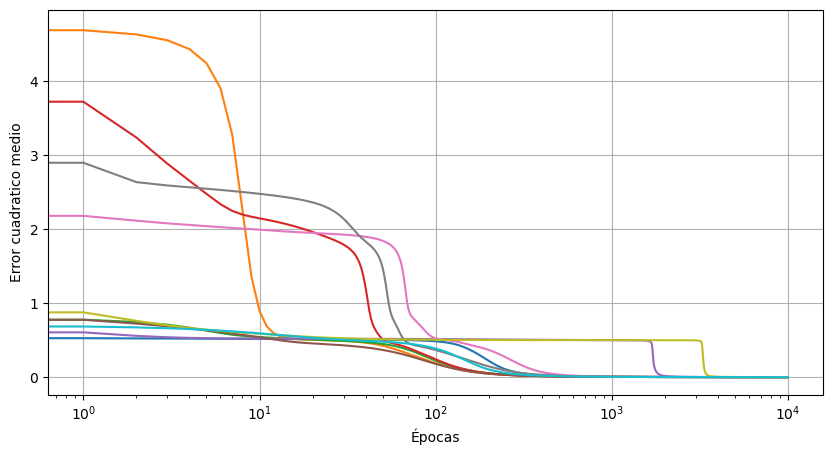

In [67]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.plot(Errores_2[i])

plt.xlabel('Épocas')
plt.ylabel('Error cuadratico medio')
plt.xscale('log')
plt.grid()

plt.savefig('Error_arq2.png', dpi=300, bbox_inches='tight')

#   2. Problema de la paridad (generalizacion de XOR)

In [28]:

N = 5 # numero de entradas
# M = 3 # numero de neuronas en la capa intermedia
# epochs = 10000

x_t = []
y_t = []

# genero todas las combinaciones posibles de las entradas
for i in range(2**N):
    #conbinacion binaria de -1 y 1 
    x = [2*((i >> j) & 1) - 1 for j in range(N)]
    x_t.append(x)
    y_t.append(np.prod(x))

x_t = np.array(x_t)
y_t = np.array(y_t)


def N_network_2(X, W_1 , W_2, B_1, B_2):

    Z_1 = tngh(np.dot(W_1, X) + B_1)
    Z_2 = tngh(np.dot(W_2, Z_1) + B_2)
    return Z_2

def backpropagation_2(X, Y, W_1, W_2, B_1, B_2, lr):

    # forward pass
    Z_1 = tngh(np.dot(W_1, X) + B_1)
    Z_2 = tngh(np.dot(W_2, Z_1) + B_2)

    error = 0.5 * (Y - Z_2)**2

    # calculate the gradient
    delta = (Y - Z_2) * tngh_prime(np.dot(W_2, Z_1) + B_2)
    grad_W_2 = np.dot(delta, Z_1.T)
    grad_B_2 = delta

    delta = np.dot(W_2.T, delta) * tngh_prime(np.dot(W_1, X) + B_1)
    grad_W_1 = np.dot(delta, X.T)
    grad_B_1 = delta

    return grad_W_1, grad_W_2, grad_B_1, grad_B_2, error

# training

def Arq_3(epochs=10000, lr=0.1, M=3, N=5):

    W_1 = np.random.randn(M,N)
    W_2 = np.random.randn(1,M)
    B_1 = np.random.randn(M,1)
    B_2 = np.random.randn(1,1)

    # print('antes: ')
    # print(f'W_1: {W_1}, \n W_2: {W_2}, \n B_1: {B_1}, \n B_2: {B_2} \n')

    it = 0
    error = []
    Acc = []

    for i in range(epochs):
        it += 1
        G_W_1 = []
        G_W_2 = []
        G_B_1 = []
        G_B_2 = []
        err_acum = 0

        for j in range(2**N):
            X = np.array(x_t[j]).reshape(N,1)
            Y = y_t[j]
            grad_W_1, grad_W_2, grad_B_1, grad_B_2, err = backpropagation_2(X, Y, W_1, W_2, B_1, B_2, lr)
            G_W_1.append(grad_W_1)
            G_W_2.append(grad_W_2)
            G_B_1.append(grad_B_1)
            G_B_2.append(grad_B_2)
            err_acum += err[0][0]

        error.append(err_acum)

        # update the weights
        G_W_1 = np.array(G_W_1)
        G_W_2 = np.array(G_W_2)
        G_B_1 = np.array(G_B_1)
        G_B_2 = np.array(G_B_2)

        W_1 = W_1 + lr * np.sum(G_W_1, axis=0)
        W_2 = W_2 + lr * np.sum(G_W_2, axis=0)
        B_1 = B_1 + lr * np.sum(G_B_1, axis=0)
        B_2 = B_2 + lr * np.sum(G_B_2, axis=0)

        # mido el Accuracy

        A = 0 
        for j in range(2**N):
            X = np.array(x_t[j]).reshape(N,1)
            Y_red = N_network_2(X, W_1, W_2, B_1, B_2)
            if np.abs(Y_red - y_t[j]) < 0.1: A += 1
        Acc.append(A/(2**N))

        # print(f'Iteracion: {it} | Error: {error}')

        # verifico con todos los ejemplos si la red aprendió, si la salida esperada y la obtenia es siempre menor a 0.1, salgo del ciclo
        # error = 0
        # for i in range(2**N):
        #     X = np.array(x_t[i]).reshape(N,1)
        #     Y_red = N_network_2(X, W_1, W_2, B_1, B_2)
        #     if np.abs(Y_red - y_t[i]) > 0.1: error += 1
        
        # if error == 0:  
        #     print(f'APRENDIO: Iteracion: {it} | Error: {err[0][0]}')
        #     break

    return W_1, W_2, B_1, B_2, error, Acc


Errores_3=[]
Acc_3=[]
ms = [1,3,5,7,9,11]

for m in ms:
    W_1, W_2, B_1, B_2, error, Acc = Arq_3(epochs=10000, lr=0.1, M=m, N=N)
    Errores_3.append(error)
    Acc_3.append(Acc)



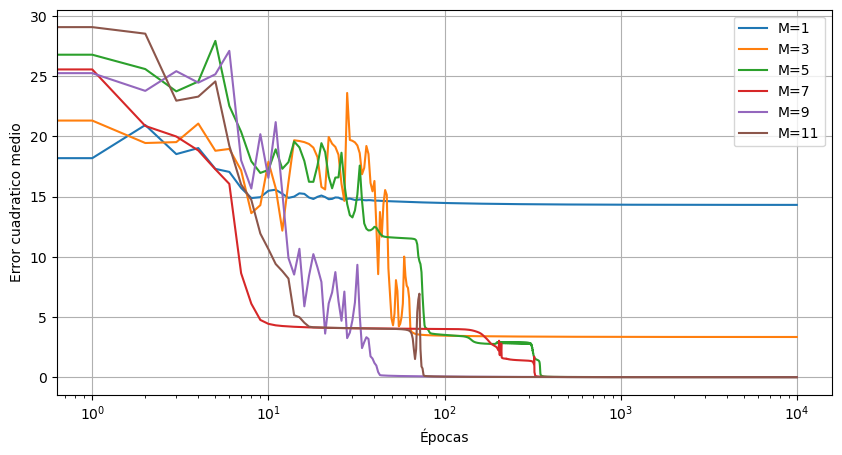

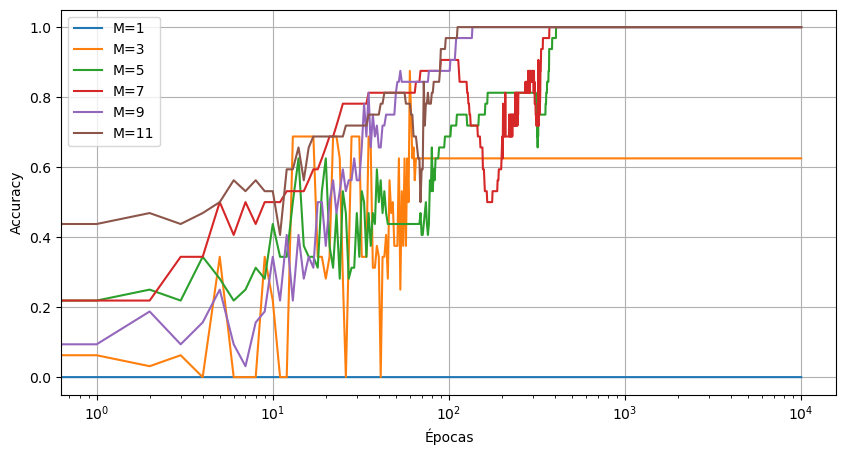

In [66]:

plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
for i in range(len(ms)):
    plt.plot(Errores_3[i], label=f'M={ms[i]}')
plt.xlabel('Épocas')
plt.ylabel('Error cuadratico medio')
plt.xscale('log')
plt.grid()
plt.legend()
plt.savefig('Error_arq3.png', dpi=300, bbox_inches='tight')
plt.show()
plt.figure(figsize=(10,5))
# plt.subplot(1,2,2)
for i in range(len(ms)):
    plt.plot(Acc_3[i], label=f'M={ms[i]}')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid()
plt.legend()
plt.savefig('Accuracy_arq3.png', dpi=300, bbox_inches='tight')

# plt.savefig('Error_Accuracy_arq3.png', dpi=300, bbox_inches='tight')